# Part 0. Prepare the data

In [14]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
# 3D to 2D tensor flattening image rows into columns
def flatten_data(data):
    count = len(data)
    shape = data[1].shape
    return data.reshape(count, shape[0] * shape[1])

# Convert from 0-255 to 0-1
def standarize_value(data):
    return data.astype('float32')/255

In [17]:
# Flatten and standarize values
train_images = standarize_value(flatten_data(train_images))
test_images = standarize_value(flatten_data(test_images))

In [18]:
# One hot encoding labels
train_labels = ku.to_categorical(train_labels)
test_labels = ku.to_categorical(test_labels)

In [19]:
data = (train_images, train_labels, test_images, test_labels)

In [20]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.figure(0)
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()

def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.figure(1)
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
 
def compile_model(layer_config, shape, l2_regularizer):
    nn = models.Sequential()
    for i in range(len(layer_config)):
        units = layer_config[i]
        kwargs = {}
        if l2_regularizer is not None:
            kwargs["kernel_regularizer"] = regularizers.l2(l2_regularizer)
        
        if i == 0:
            layer = layers.Dense(units, activation = 'relu', input_shape = (shape[0], ), **kwargs)
        else:
            layer = layers.Dense(units, activation = 'relu',  **kwargs)
        nn.add(layer)
        
    nn.add(layers.Dense(10, activation = 'softmax'))
    nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return nn

def analyze_sequential_model(data, layer_config, epochs=5, l2_regularizer=None):
    train_X, train_y, test_X, test_y = data
    shape = train_X[0].shape
    nn = compile_model(layer_config, shape, l2_regularizer)
    fit_log = nn.fit(train_X, train_y, epochs = epochs, batch_size = 128, validation_data = (test_X, test_y))
    plot_loss(fit_log)
    plot_accuracy(fit_log)

# Part 1
A network with a single hidden layer of 1024 units. Compare these results to the single layer model with 512 units.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2562 - accuracy: 0.9258 - val_loss: 0.1244 - val_accuracy: 0.9626
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1034 - accuracy: 0.9692 - val_loss: 0.0937 - val_accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0765 - val_accuracy: 0.9771
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0841 - val_accuracy: 0.9735
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0690 - val_accuracy: 0.9802
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0657 - val_accuracy: 0.9800
Epoch 7/10
60000/60000 [==============================] - 2s 34us/st

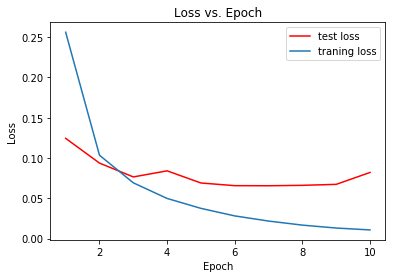

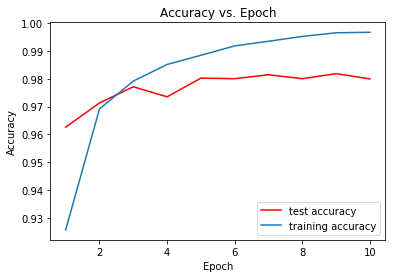

In [21]:
analyze_sequential_model(data, [512], 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2318 - accuracy: 0.9305 - val_loss: 0.1151 - val_accuracy: 0.9652
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0885 - accuracy: 0.9735 - val_loss: 0.0829 - val_accuracy: 0.9765
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0785 - val_accuracy: 0.9752
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0647 - val_accuracy: 0.9818
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0643 - val_accuracy: 0.9811
Epoch 7/10
60000/60000 [==============================] - 2s 39us/st

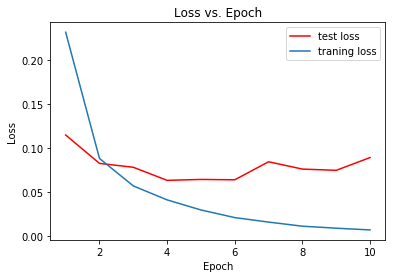

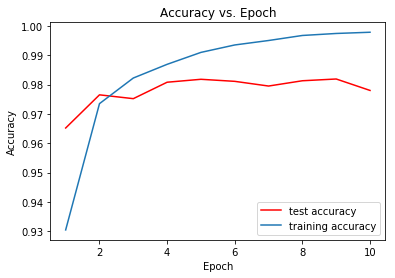

In [22]:
analyze_sequential_model(data, [1024], 10)

### How do the number of training epochs before over-fitting compare?
There isn't too much different between the two, both reach a peak around the fourth epoch. That said, the model with 1024 units presented way more variance after the forth epoch, while the 512 mantained a relative stability.

### How does the best loss function compare?
The low capacity model performed better in this regard, presenting a loss of `0.0624` in the sixth epoch. While the 1024 model smaller value happened at epoch 4th with `0.0670`

### How does the best accuracy metric compare?
While ignoring that everything that raises the loss probably is overfitted, the 512 model presented an accuracy of `0.9826` at the 10th epoch. The 1024 model highest accuracy occured at the 9 epoch `0.9832`. In both cases the loss value is higher that the best observed.

# Part 2
A network with 2 hidden layers of 1024 units, using L2 kernel regularizaiton with parameter 0.01. Compare these results to the single hidden layer network with 1024 units.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2355 - accuracy: 0.9299 - val_loss: 0.1155 - val_accuracy: 0.9644
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0880 - accuracy: 0.9730 - val_loss: 0.0882 - val_accuracy: 0.9726
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0604 - val_accuracy: 0.9827
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0720 - val_accuracy: 0.9789
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0680 - val_accuracy: 0.9815
Epoch 7/10
60000/60000 [==============================] - 2s 40us/st

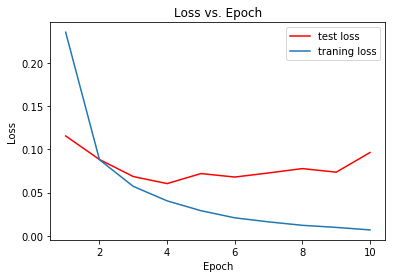

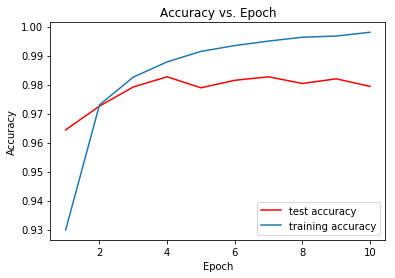

In [23]:
analyze_sequential_model(data, [1024], 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 1.4818 - accuracy: 0.8714 - val_loss: 0.4684 - val_accuracy: 0.9355
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.4695 - accuracy: 0.9222 - val_loss: 0.4618 - val_accuracy: 0.9148
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3822 - accuracy: 0.9394 - val_loss: 0.3536 - val_accuracy: 0.9424
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3433 - accuracy: 0.9453 - val_loss: 0.3790 - val_accuracy: 0.9266
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3204 - accuracy: 0.9485 - val_loss: 0.3145 - val_accuracy: 0.9480
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3077 - accuracy: 0.9512 - val_loss: 0.3021 - val_accuracy: 0.9516
Epoch 7/10
60000/60000 [==============================] - 4s 60us/st

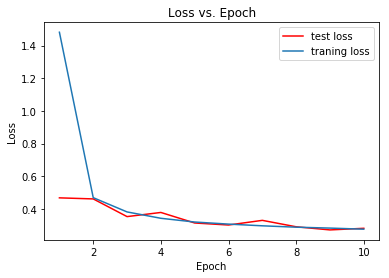

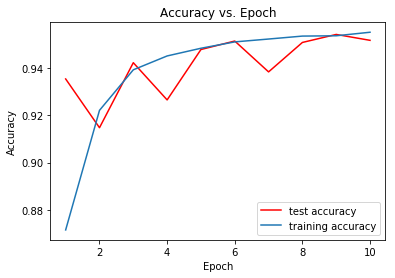

In [24]:
analyze_sequential_model(data, [1024, 1024], 10, 0.01)

### How do the number of training epochs before over-fitting compare?
The network with two layers presented higher variability over the training epochs. Additionally at first glance it would seem that we lost significant performance by adding another layer and regularization, but my intuition tells me that in reality what we are observing is the reduction of the overfit by forcing the model to not learn the training data.

### How does the best loss function compare?
The single layer model performed better with a loss of `0.0616`, while the double layer one presented `0.2656`. These two numbers are not even in the same ballpark. I'm not confident enough that this could be explained by overfitting.

### How does the best accuracy metric compare?
The single layer model show better performance in this regard as well. It has an accuracy of `0.9834` in the 8th epoch, while the double layer model presented an accuracy significantly smaller with `0.9784` on the seventh epoch.

# Part 3
A network with 2 hidden layers of 512 units, using L2 kernel regularizaiton with parameter 0.01. Compare the results to a) the single hidden layer network with 512 units and L2 regularization, and b) the 2 hidden layer network with 1024 units with L2 regularization.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.9155 - accuracy: 0.8895 - val_loss: 0.4199 - val_accuracy: 0.9293
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.4272 - accuracy: 0.9205 - val_loss: 0.3643 - val_accuracy: 0.9387
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3835 - accuracy: 0.9298 - val_loss: 0.3396 - val_accuracy: 0.9458
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3580 - accuracy: 0.9365 - val_loss: 0.3179 - val_accuracy: 0.9486
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3375 - accuracy: 0.9411 - val_loss: 0.3440 - val_accuracy: 0.9407
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3236 - accuracy: 0.9419 - val_loss: 0.2718 - val_accuracy: 0.9603
Epoch 7/10
60000/60000 [==============================] - 2s 36us/st

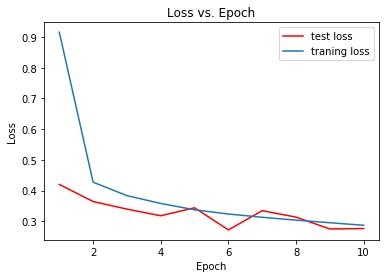

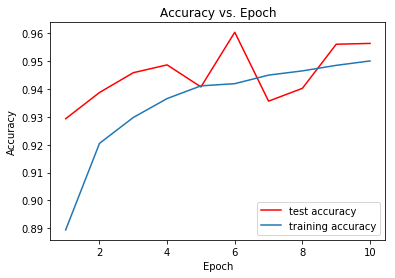

In [25]:
analyze_sequential_model(data, [512], 10, 0.01)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 1.4739 - accuracy: 0.8726 - val_loss: 0.5118 - val_accuracy: 0.9157
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.4691 - accuracy: 0.9227 - val_loss: 0.4241 - val_accuracy: 0.9294
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3888 - accuracy: 0.9373 - val_loss: 0.3866 - val_accuracy: 0.9355
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3516 - accuracy: 0.9440 - val_loss: 0.3173 - val_accuracy: 0.9527
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3257 - accuracy: 0.9481 - val_loss: 0.3633 - val_accuracy: 0.9328
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3108 - accuracy: 0.9496 - val_loss: 0.3234 - val_accuracy: 0.9475
Epoch 7/10
60000/60000 [==============================] - 4s 58us/st

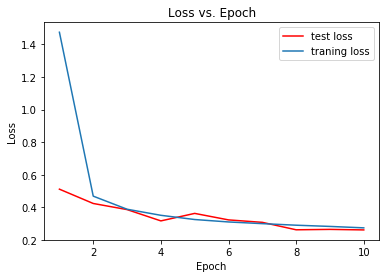

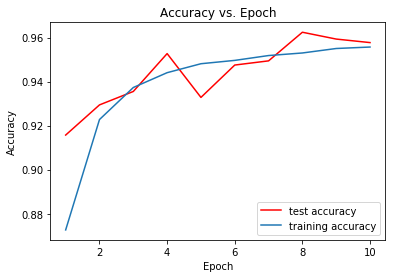

In [26]:
analyze_sequential_model(data, [1024, 1024], 10, 0.01)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.3990 - accuracy: 0.8758 - val_loss: 0.5220 - val_accuracy: 0.9177
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4892 - accuracy: 0.9207 - val_loss: 0.4219 - val_accuracy: 0.9340
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4080 - accuracy: 0.9363 - val_loss: 0.3571 - val_accuracy: 0.9471
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3631 - accuracy: 0.9428 - val_loss: 0.3801 - val_accuracy: 0.9342
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3360 - accuracy: 0.9480 - val_loss: 0.3028 - val_accuracy: 0.9554
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3176 - accuracy: 0.9495 - val_loss: 0.2767 - val_accuracy: 0.9607
Epoch 7/10
60000/60000 [==============================] - 3s 44us/st

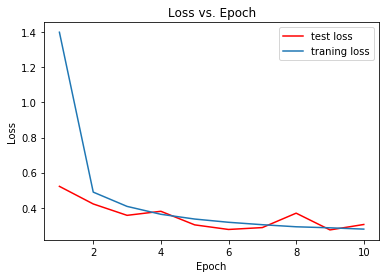

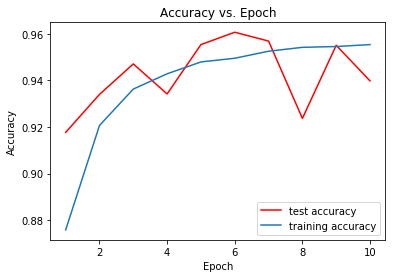

In [27]:
analyze_sequential_model(data, [512, 512], 10, 0.01)

### How do the number of training epochs before over-fitting compare?
The double 1024 unit layers trained in a more stable way until the 8th epoch where it clearly overfits. The single 512 presented a lot of training variance making difficult to know when the actual overfit happens. The two 512 layer model presented a more stable version of the single layer, nevertheless still does not present a clear point when it overfits. One could say that at the epoch 4 we should have stopped but is clear that epoch 9 presents way better performance.

### How does the best loss function compare?
All the three models presented very similar loss function performance, with differences in the cents of a point. Single 512: `0.2644`, Double 1024: `0.2672`, Double 512: `0.2683`

### How does the best accuracy metric compare?
Single 512: `0.9568`, Double 1024: `0.9613`, Double 512: `0.9574`. While both 512 performed similarly, the 1024 model performance was significantly better. It seems that the additional capacity of the 1024 model makes a difference when describing this dataset.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.3963 - accuracy: 0.8770 - val_loss: 0.5669 - val_accuracy: 0.9022
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.4899 - accuracy: 0.9216 - val_loss: 0.4913 - val_accuracy: 0.9092
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.4079 - accuracy: 0.9347 - val_loss: 0.3898 - val_accuracy: 0.9342
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.3609 - accuracy: 0.9436 - val_loss: 0.3625 - val_accuracy: 0.9365
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.3326 - accuracy: 0.9481 - val_loss: 0.3128 - val_accuracy: 0.9494
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.3126 - accuracy: 0.9504 - val_loss: 0.3345 - val_accuracy: 0.9406
Epoch 7/20
60000/60000 [==============================] - 3s 43us/st

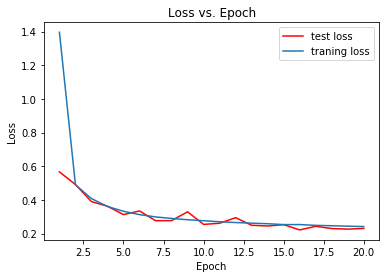

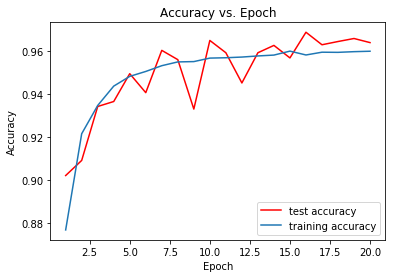

In [28]:
analyze_sequential_model(data, [512, 512], 20, 0.01)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 1.4946 - accuracy: 0.8729 - val_loss: 0.5142 - val_accuracy: 0.9199
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4706 - accuracy: 0.9226 - val_loss: 0.4256 - val_accuracy: 0.9199
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3901 - accuracy: 0.9359 - val_loss: 0.3439 - val_accuracy: 0.9466
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3500 - accuracy: 0.9447 - val_loss: 0.3326 - val_accuracy: 0.9480
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3241 - accuracy: 0.9484 - val_loss: 0.3387 - val_accuracy: 0.9423
Epoch 6/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.3110 - accuracy: 0.9507 - val_loss: 0.2846 - val_accuracy: 0.9543
Epoch 7/20
60000/60000 [==============================] - 3s 58us/st

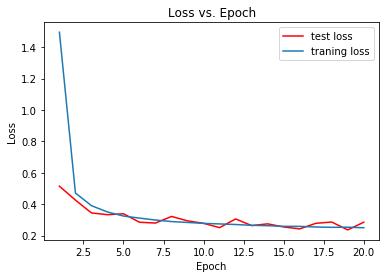

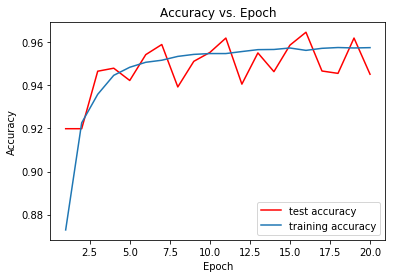

In [29]:
analyze_sequential_model(data, [1024, 1024], 20, 0.01)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 2.2316 - accuracy: 0.8381 - val_loss: 0.7641 - val_accuracy: 0.9040
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.6892 - accuracy: 0.9111 - val_loss: 0.5666 - val_accuracy: 0.9371
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.5750 - accuracy: 0.9275 - val_loss: 0.4838 - val_accuracy: 0.9509
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.5206 - accuracy: 0.9355 - val_loss: 0.4611 - val_accuracy: 0.9479
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4858 - accuracy: 0.9402 - val_loss: 0.4486 - val_accuracy: 0.9502
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4603 - accuracy: 0.9439 - val_loss: 0.4598 - val_accuracy: 0.9373
Epoch 7/20
60000/60000 [==============================] - 4s 62us/st

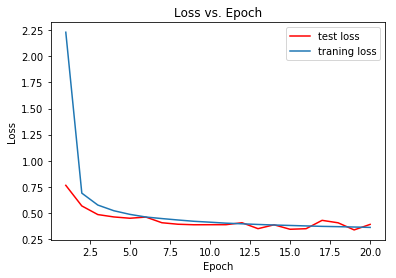

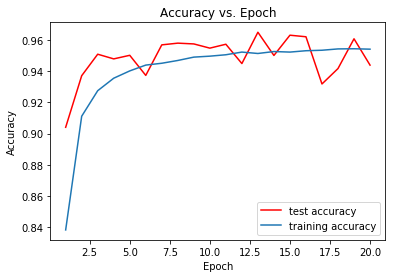

In [30]:
analyze_sequential_model(data, [512, 512, 512, 512], 20, 0.01)

### How do the number of training epochs before over-fitting compare?
I had to increase the number of epochs for this models because it was hard to know when they overfit, they kept showing this unstable pattern of good-bad epoch. Interestingly there is not a significant differents of the number of epochs they all trained between 6 and 8.

### How does the best loss function compare?
The best loss result for the double 512: `0.2422`, for the double 1024: `0.2382`, and quad 512: `0.3346`. This is significantly worse for the 512 quad layer, it may seem that even if it has the same number of units that the double 1024 is more prone to overfit. 

### How does the best accuracy metric compare?
The best accuracy for the double 512: `0.9647`, for the double 1024: `0.9643`, and quad 512: `0.9594`. In consistent way with the loss function, it seems that the additional freedom that the two extra layers provide to the 512 model allows it to learn the training data better and overfit.